<a href="https://colab.research.google.com/github/juantoro5/Proyecto-IA-Zillow-prize/blob/main/03_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Es fundamental correr todos los codigos desde el inicio, en este Notebook se hara mayor enfasis como su nombre lo indica en la parte del Modelo.***

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
#bibliotecas de machine learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit

from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn import utils
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,KFold,GroupKFold
import lightgbm as lgb
import gc


import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"juanjosetorovillegas","key":"1efd06c40a72c357b8a7762567371873"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c zillow-prize-1 

 96% 325M/340M [00:03<00:00, 91.3MB/s]
100% 340M/340M [00:03<00:00, 109MB/s] 


In [ ]:
! unzip zillow-prize-1

Archive:  zillow-prize-1.zip
  inflating: properties_2016.csv     
  inflating: properties_2017.csv     
  inflating: sample_submission.csv   
  inflating: train_2016_v2.csv       
  inflating: train_2017.csv          
  inflating: zillow_data_dictionary.xlsx  


In [ ]:
#cargar los datos
train2016 = pd.read_csv("train_2016_v2.csv")
train2017 = pd.read_csv("train_2017.csv")
properties_2016 = pd.read_csv("properties_2016.csv")
properties_2017 = pd.read_csv("properties_2017.csv")

In [ ]:
#Concatenamos los datos de train:
train_2016 = train2016.merge(properties_2016)

In [ ]:
#Concatenamos los datos de train:
train_2017 = train2017.merge(properties_2017)

Eliminación de las columnas con muchos datos faltantes

In [ ]:
missing_percentages = train_2016.isnull().mean()
missing_percentages

parcelid                        0.000000
logerror                        0.000000
transactiondate                 0.000000
airconditioningtypeid           0.681185
architecturalstyletypeid        0.997109
basementsqft                    0.999524
bathroomcnt                     0.000000
bedroomcnt                      0.000000
buildingclasstypeid             0.999823
buildingqualitytypeid           0.364564
calculatedbathnbr               0.013093
decktypeid                      0.992711
finishedfloor1squarefeet        0.924054
calculatedfinishedsquarefeet    0.007322
finishedsquarefeet12            0.051831
finishedsquarefeet13            0.999634
finishedsquarefeet15            0.960521
finishedsquarefeet50            0.924054
finishedsquarefeet6             0.995336
fips                            0.000000
fireplacecnt                    0.893581
fullbathcnt                     0.013093
garagecarcnt                    0.668380
garagetotalsqft                 0.668380
hashottuborspa  

In [ ]:
missing_percentages1 = train_2017.isnull().mean()
missing_percentages1

parcelid                        0.000000
logerror                        0.000000
transactiondate                 0.000000
airconditioningtypeid           0.677799
architecturalstyletypeid        0.997333
basementsqft                    0.999356
bathroomcnt                     0.000438
bedroomcnt                      0.000438
buildingclasstypeid             0.999807
buildingqualitytypeid           0.358239
calculatedbathnbr               0.008375
decktypeid                      0.992089
finishedfloor1squarefeet        0.922217
calculatedfinishedsquarefeet    0.003028
finishedsquarefeet12            0.047544
finishedsquarefeet13            0.999459
finishedsquarefeet15            0.960999
finishedsquarefeet50            0.922217
finishedsquarefeet6             0.995027
fips                            0.000438
fireplacecnt                    0.893201
fullbathcnt                     0.008375
garagecarcnt                    0.671189
garagetotalsqft                 0.671189
hashottuborspa  

In [ ]:
columns_to_drop = missing_percentages[missing_percentages > 0.7].index
columns_to_drop

Index(['architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid',
       'decktypeid', 'finishedfloor1squarefeet', 'finishedsquarefeet13',
       'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6',
       'fireplacecnt', 'hashottuborspa', 'poolcnt', 'poolsizesum',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'storytypeid',
       'threequarterbathnbr', 'typeconstructiontypeid', 'yardbuildingsqft17',
       'yardbuildingsqft26', 'numberofstories', 'fireplaceflag',
       'taxdelinquencyflag', 'taxdelinquencyyear'],
      dtype='object')

In [ ]:
columns_to_drop1 = missing_percentages1[missing_percentages1 > 0.7].index
columns_to_drop1

Index(['architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid',
       'decktypeid', 'finishedfloor1squarefeet', 'finishedsquarefeet13',
       'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6',
       'fireplacecnt', 'hashottuborspa', 'poolcnt', 'poolsizesum',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'storytypeid',
       'threequarterbathnbr', 'typeconstructiontypeid', 'yardbuildingsqft17',
       'yardbuildingsqft26', 'numberofstories', 'fireplaceflag',
       'taxdelinquencyflag', 'taxdelinquencyyear'],
      dtype='object')

In [ ]:
train_2016.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
train_2017.drop(columns_to_drop1, axis=1, inplace=True)

In [ ]:
missing_percentages = train_2016.isnull().mean()
missing_percentages

parcelid                        0.000000
logerror                        0.000000
transactiondate                 0.000000
airconditioningtypeid           0.681185
bathroomcnt                     0.000000
bedroomcnt                      0.000000
buildingqualitytypeid           0.364564
calculatedbathnbr               0.013093
calculatedfinishedsquarefeet    0.007322
finishedsquarefeet12            0.051831
fips                            0.000000
fullbathcnt                     0.013093
garagecarcnt                    0.668380
garagetotalsqft                 0.668380
heatingorsystemtypeid           0.378787
latitude                        0.000000
longitude                       0.000000
lotsizesquarefeet               0.112434
propertycountylandusecode       0.000011
propertylandusetypeid           0.000000
propertyzoningdesc              0.354052
rawcensustractandblock          0.000000
regionidcity                    0.019972
regionidcounty                  0.000000
regionidneighbor

In [ ]:
missing_percentages1 = train_2017.isnull().mean()
missing_percentages1

parcelid                        0.000000
logerror                        0.000000
transactiondate                 0.000000
airconditioningtypeid           0.677799
bathroomcnt                     0.000438
bedroomcnt                      0.000438
buildingqualitytypeid           0.358239
calculatedbathnbr               0.008375
calculatedfinishedsquarefeet    0.003028
finishedsquarefeet12            0.047544
fips                            0.000438
fullbathcnt                     0.008375
garagecarcnt                    0.671189
garagetotalsqft                 0.671189
heatingorsystemtypeid           0.361305
latitude                        0.000438
longitude                       0.000438
lotsizesquarefeet               0.106838
propertycountylandusecode       0.000438
propertylandusetypeid           0.000438
propertyzoningdesc              0.349645
rawcensustractandblock          0.000438
regionidcity                    0.019404
regionidcounty                  0.000438
regionidneighbor

In [ ]:
train_2016['airconditioningtypeid'].fillna(train_2017.airconditioningtypeid.median(), inplace=True)
train_2016['bathroomcnt'].fillna(train_2017.bathroomcnt.median(), inplace=True)
train_2016['bedroomcnt'].fillna(train_2017.bedroomcnt.median(), inplace=True)
train_2016['buildingqualitytypeid'].fillna(train_2017.buildingqualitytypeid.median(), inplace=True)
train_2016['calculatedbathnbr'].fillna(train_2017.calculatedbathnbr.median(), inplace=True)
train_2016['calculatedfinishedsquarefeet'].fillna(train_2017.calculatedfinishedsquarefeet.median(), inplace=True)
train_2016['finishedsquarefeet12'].fillna(train_2017.finishedsquarefeet12.median(), inplace=True)
train_2016['fips'].fillna(train_2017.fips.median(), inplace=True)
train_2016['fullbathcnt'].fillna(train_2017.fullbathcnt.median(), inplace=True)
train_2016['garagecarcnt'].fillna(train_2017.garagecarcnt.median(), inplace=True)
train_2016['garagetotalsqft'].fillna(train_2017.garagetotalsqft.median(), inplace=True)
train_2016['heatingorsystemtypeid'].fillna(train_2017.heatingorsystemtypeid.median(), inplace=True)
train_2016['latitude'].fillna(train_2017.latitude.median(), inplace=True)
train_2016['longitude'].fillna(train_2017.longitude.median(), inplace=True)
train_2016['finishedsquarefeet12'].fillna(train_2017.finishedsquarefeet12.median(), inplace=True)
train_2016['lotsizesquarefeet'].fillna(train_2017.lotsizesquarefeet.median(), inplace=True)
#train_2016['propertycountylandusecode'].fillna(train_2017.propertycountylandusecode.median(), inplace=True)
train_2016['propertylandusetypeid'].fillna(train_2017.propertylandusetypeid.median(), inplace=True)
#train_2016['propertyzoningdesc'].fillna(train_2017.propertyzoningdesc.median(), inplace=True)
train_2016['rawcensustractandblock'].fillna(train_2017.rawcensustractandblock.median(), inplace=True)
train_2016['regionidcity'].fillna(train_2017.regionidcity.median(), inplace=True)
train_2016['regionidcounty'].fillna(train_2017.regionidcounty.median(), inplace=True)
train_2016['regionidneighborhood'].fillna(train_2017.regionidneighborhood.median(), inplace=True)
train_2016['regionidzip'].fillna(train_2017.regionidzip.median(), inplace=True)
train_2016['roomcnt'].fillna(train_2017.roomcnt.median(), inplace=True)
train_2016['unitcnt'].fillna(train_2017.unitcnt.median(), inplace=True)
train_2016['yearbuilt'].fillna(train_2017.yearbuilt.median(), inplace=True)
train_2016['structuretaxvaluedollarcnt'].fillna(train_2017.structuretaxvaluedollarcnt.median(), inplace=True)
train_2016['taxvaluedollarcnt'].fillna(train_2017.taxvaluedollarcnt.median(), inplace=True)
train_2016['assessmentyear'].fillna(train_2017.assessmentyear.median(), inplace=True)
train_2016['landtaxvaluedollarcnt'].fillna(train_2017.landtaxvaluedollarcnt.median(), inplace=True)
train_2016['taxamount'].fillna(train_2017.taxamount.median(), inplace=True)
train_2016['censustractandblock'].fillna(train_2017.censustractandblock.median(), inplace=True)

In [ ]:
train_2017['airconditioningtypeid'].fillna(train_2017.airconditioningtypeid.median(), inplace=True)
train_2017['bathroomcnt'].fillna(train_2017.bathroomcnt.median(), inplace=True)
train_2017['bedroomcnt'].fillna(train_2017.bedroomcnt.median(), inplace=True)
train_2017['buildingqualitytypeid'].fillna(train_2017.buildingqualitytypeid.median(), inplace=True)
train_2017['calculatedbathnbr'].fillna(train_2017.calculatedbathnbr.median(), inplace=True)
train_2017['calculatedfinishedsquarefeet'].fillna(train_2017.calculatedfinishedsquarefeet.median(), inplace=True)
train_2017['finishedsquarefeet12'].fillna(train_2017.finishedsquarefeet12.median(), inplace=True)
train_2017['fips'].fillna(train_2017.fips.median(), inplace=True)
train_2017['fullbathcnt'].fillna(train_2017.fullbathcnt.median(), inplace=True)
train_2017['garagecarcnt'].fillna(train_2017.garagecarcnt.median(), inplace=True)
train_2017['garagetotalsqft'].fillna(train_2017.garagetotalsqft.median(), inplace=True)
train_2017['heatingorsystemtypeid'].fillna(train_2017.heatingorsystemtypeid.median(), inplace=True)
train_2017['latitude'].fillna(train_2017.latitude.median(), inplace=True)
train_2017['longitude'].fillna(train_2017.longitude.median(), inplace=True)
train_2017['finishedsquarefeet12'].fillna(train_2017.finishedsquarefeet12.median(), inplace=True)
train_2017['lotsizesquarefeet'].fillna(train_2017.lotsizesquarefeet.median(), inplace=True)
#train_2017['propertycountylandusecode'].fillna(train_2017.propertycountylandusecode.median(), inplace=True)
train_2017['propertylandusetypeid'].fillna(train_2017.propertylandusetypeid.median(), inplace=True)
#train_2017['propertyzoningdesc'].fillna(train_2017.propertyzoningdesc.median(), inplace=True)
train_2017['rawcensustractandblock'].fillna(train_2017.rawcensustractandblock.median(), inplace=True)
train_2017['regionidcity'].fillna(train_2017.regionidcity.median(), inplace=True)
train_2017['regionidcounty'].fillna(train_2017.regionidcounty.median(), inplace=True)
train_2017['regionidneighborhood'].fillna(train_2017.regionidneighborhood.median(), inplace=True)
train_2017['regionidzip'].fillna(train_2017.regionidzip.median(), inplace=True)
train_2017['roomcnt'].fillna(train_2017.roomcnt.median(), inplace=True)
train_2017['unitcnt'].fillna(train_2017.unitcnt.median(), inplace=True)
train_2017['yearbuilt'].fillna(train_2017.yearbuilt.median(), inplace=True)
train_2017['structuretaxvaluedollarcnt'].fillna(train_2017.structuretaxvaluedollarcnt.median(), inplace=True)
train_2017['taxvaluedollarcnt'].fillna(train_2017.taxvaluedollarcnt.median(), inplace=True)
train_2017['assessmentyear'].fillna(train_2017.assessmentyear.median(), inplace=True)
train_2017['landtaxvaluedollarcnt'].fillna(train_2017.landtaxvaluedollarcnt.median(), inplace=True)
train_2017['taxamount'].fillna(train_2017.taxamount.median(), inplace=True)
train_2017['censustractandblock'].fillna(train_2017.censustractandblock.median(), inplace=True)

In [ ]:
missing_percentages16 = train_2016.isnull().mean()
missing_percentages16

parcelid                        0.000000
logerror                        0.000000
transactiondate                 0.000000
airconditioningtypeid           0.000000
bathroomcnt                     0.000000
bedroomcnt                      0.000000
buildingqualitytypeid           0.000000
calculatedbathnbr               0.000000
calculatedfinishedsquarefeet    0.000000
finishedsquarefeet12            0.000000
fips                            0.000000
fullbathcnt                     0.000000
garagecarcnt                    0.000000
garagetotalsqft                 0.000000
heatingorsystemtypeid           0.000000
latitude                        0.000000
longitude                       0.000000
lotsizesquarefeet               0.000000
propertycountylandusecode       0.000011
propertylandusetypeid           0.000000
propertyzoningdesc              0.354052
rawcensustractandblock          0.000000
regionidcity                    0.000000
regionidcounty                  0.000000
regionidneighbor

In [ ]:
missing_percentages17 = train_2017.isnull().mean()
missing_percentages17

parcelid                        0.000000
logerror                        0.000000
transactiondate                 0.000000
airconditioningtypeid           0.000000
bathroomcnt                     0.000000
bedroomcnt                      0.000000
buildingqualitytypeid           0.000000
calculatedbathnbr               0.000000
calculatedfinishedsquarefeet    0.000000
finishedsquarefeet12            0.000000
fips                            0.000000
fullbathcnt                     0.000000
garagecarcnt                    0.000000
garagetotalsqft                 0.000000
heatingorsystemtypeid           0.000000
latitude                        0.000000
longitude                       0.000000
lotsizesquarefeet               0.000000
propertycountylandusecode       0.000438
propertylandusetypeid           0.000000
propertyzoningdesc              0.349645
rawcensustractandblock          0.000000
regionidcity                    0.000000
regionidcounty                  0.000000
regionidneighbor

In [ ]:
logerror_zero16 = list(train_2016[train_2016.logerror == 0].index) #lista con los indices de los valores que tienen lecturas 0
logerror_zero16

[64,
 143,
 223,
 339,
 655,
 694,
 826,
 833,
 870,
 1123,
 1293,
 1323,
 1348,
 1389,
 1396,
 1641,
 1752,
 1807,
 1886,
 1969,
 2061,
 2315,
 2609,
 2707,
 2898,
 3311,
 3370,
 3420,
 3519,
 3590,
 3635,
 3942,
 4007,
 4157,
 4165,
 4167,
 4238,
 4375,
 4450,
 4563,
 4570,
 4628,
 4632,
 4676,
 4783,
 4973,
 5054,
 5114,
 5117,
 5129,
 5161,
 5506,
 5613,
 5648,
 5688,
 5773,
 5776,
 5799,
 5847,
 6070,
 6180,
 6223,
 6352,
 6355,
 6386,
 6479,
 6488,
 6601,
 6822,
 6859,
 7058,
 7091,
 7147,
 7175,
 7204,
 7231,
 7234,
 7593,
 7659,
 7662,
 7695,
 7844,
 7874,
 8035,
 8071,
 8265,
 8840,
 8984,
 9023,
 9308,
 9468,
 9748,
 9776,
 10140,
 10390,
 10456,
 10568,
 10681,
 10690,
 10894,
 11032,
 11159,
 11543,
 11599,
 11775,
 11964,
 11998,
 12044,
 12169,
 12523,
 12537,
 12593,
 12635,
 12688,
 12829,
 12855,
 12903,
 13018,
 13091,
 13128,
 13329,
 13337,
 13340,
 13538,
 13734,
 13893,
 14300,
 14363,
 14437,
 14583,
 14808,
 14890,
 14923,
 14941,
 14996,
 15236,
 15312,
 15687,

In [ ]:
print(train_2016.dtypes)

parcelid                          int64
logerror                        float64
transactiondate                  object
airconditioningtypeid           float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fips                            float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
heatingorsystemtypeid           float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode        object
propertylandusetypeid           float64
propertyzoningdesc               object
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidneighborhood            float64


In [ ]:
logerror_zero17 = list(train_2017[train_2017.logerror == 0].index) #lista con los indices de los valores que tienen lecturas 0
logerror_zero17

[]

In [ ]:
print(train_2017.dtypes)

parcelid                          int64
logerror                        float64
transactiondate                  object
airconditioningtypeid           float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fips                            float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
heatingorsystemtypeid           float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode        object
propertylandusetypeid           float64
propertyzoningdesc               object
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidneighborhood            float64


In [ ]:
var_categoricas16 = ["propertyzoningdesc", "propertycountylandusecode","transactiondate"]
encoder16 = preprocessing.LabelEncoder()

for i in var_categoricas16:
    
    train_2016[i] = encoder16.fit_transform(train_2016[i])
    
print (train_2016.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      90275 non-null  int64  
 1   logerror                      90275 non-null  float64
 2   transactiondate               90275 non-null  int64  
 3   airconditioningtypeid         90275 non-null  float64
 4   bathroomcnt                   90275 non-null  float64
 5   bedroomcnt                    90275 non-null  float64
 6   buildingqualitytypeid         90275 non-null  float64
 7   calculatedbathnbr             90275 non-null  float64
 8   calculatedfinishedsquarefeet  90275 non-null  float64
 9   finishedsquarefeet12          90275 non-null  float64
 10  fips                          90275 non-null  float64
 11  fullbathcnt                   90275 non-null  float64
 12  garagecarcnt                  90275 non-null  float64
 13  g

In [ ]:
var_categoricas17 = ["propertyzoningdesc", "propertycountylandusecode", "transactiondate"]
encoder17 = preprocessing.LabelEncoder()

for i in var_categoricas17:
    
    train_2017[i] = encoder17.fit_transform(train_2017[i])
    
print (train_2017.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77613 entries, 0 to 77612
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77613 non-null  int64  
 1   logerror                      77613 non-null  float64
 2   transactiondate               77613 non-null  int64  
 3   airconditioningtypeid         77613 non-null  float64
 4   bathroomcnt                   77613 non-null  float64
 5   bedroomcnt                    77613 non-null  float64
 6   buildingqualitytypeid         77613 non-null  float64
 7   calculatedbathnbr             77613 non-null  float64
 8   calculatedfinishedsquarefeet  77613 non-null  float64
 9   finishedsquarefeet12          77613 non-null  float64
 10  fips                          77613 non-null  float64
 11  fullbathcnt                   77613 non-null  float64
 12  garagecarcnt                  77613 non-null  float64
 13  g

In [ ]:
train_2016.shape

(90275, 35)

In [ ]:
train_2017.shape

(77613, 35)

**MODELO** 

Métrica

Como métrica de Machine Learning usaremos el MAE (Mean Absolute Error) entre el error 
de registro previsto y el error de registro real. Esto para facilitar y cuantificar la precisión del 
modelo, el cual se espera que tenga un porcentaje de acierto alto y que a su vez se vea 
reflejado en la cantidad de personas que usan la aplicación a la hora de hablar de bienes 
raíces.
El error de registro definido así:
𝑙𝑜𝑔𝑒𝑟𝑟𝑜𝑟 = 𝑙𝑜𝑔𝑍𝑒𝑠𝑡𝑖𝑚𝑎𝑡𝑒 − 𝑙𝑜𝑔𝑝𝑟𝑒𝑐𝑖𝑜 𝑣𝑒𝑛𝑡𝑎

In [ ]:
from sklearn.metrics import mean_absolute_error

# Obtener el número mínimo de filas entre los dos datasets
min_rows = min(len(train_2016), len(train_2017))

In [ ]:
min_rows

77613

In [ ]:
# Seleccionar un subconjunto de filas en el dataset más grande
train_2016 = train_2016[:min_rows]
train_2017 = train_2017[:min_rows]

In [ ]:
# Calcular el MAE entre los errores de registro previstos y reales
mae = mean_absolute_error(train_2016['logerror'], train_2017['logerror'])

In [ ]:
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.11307266377047162


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Obtener el número mínimo de filas entre los dos datasets
min_rows = min(len(train_2016), len(train_2017))

In [ ]:
# Seleccionar un subconjunto de filas en el dataset más grande
train_2016 = train_2016[:min_rows]
train_2017 = train_2017[:min_rows]

In [ ]:
# Separar los datos en características (X) y variable objetivo (y)
X_2016 = train_2016.drop('logerror', axis=1)
y_2016 = train_2016['logerror']
X_2017 = train_2017.drop('logerror', axis=1)
y_2017 = train_2017['logerror']

In [ ]:
# Regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_2016, y_2016)
predictions_linear = linear_model.predict(X_2017)
mae_linear = mean_absolute_error(y_2017, predictions_linear)
print("MAE - Regresión Lineal:", mae_linear)

MAE - Regresión Lineal: 0.07047456750960691


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# Crear el objeto DMatrix para XGBoost
dtrain = xgb.DMatrix(X_2016, label=y_2016)
dtest = xgb.DMatrix(X_2017)

In [ ]:
# Configurar los parámetros del modelo de bosque aleatorio
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'mae'
}

In [ ]:
# Entrenar el modelo de bosque aleatorio
model = xgb.train(params, dtrain)

In [ ]:
# Realizar predicciones en el dataset 2017
predictions = model.predict(dtest)


In [ ]:
# Calcular el MAE entre las predicciones y los valores reales del logerror
maeBA = mean_absolute_error(y_2017, predictions)
print("MAE - Bosque Aleatorio (XGBoost):", maeBA)

MAE - Bosque Aleatorio (XGBoost): 0.07342472678372643


In [ ]:
# Comparar las variables y encontrar el menor
menor = min(mae, mae_linear, maeBA)

# Imprimir el resultado
print("El menor valor es:", menor, "mae linear")


El menor valor es: 0.07047456750960691 mae linear


Validación Cruzada

In [ ]:
from sklearn.model_selection import cross_val_score


# Separar los datos en características (X) y variable objetivo (y)
X = pd.concat([train_2016, train_2017]).drop('logerror', axis=1)
y = pd.concat([train_2016, train_2017])['logerror']

In [ ]:
# Crear el modelo de regresión lineal
model = LinearRegression()

In [ ]:
# Realizar validación cruzada con 5 folds
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=5)

In [ ]:
# Calcular el MAE promedio a partir de los scores
mae_cv = -scores.mean()

In [ ]:
print("MAE - Validación Cruzada:", mae_cv)

MAE - Validación Cruzada: 0.06998102060651418


Comparamos con y sin validación cruzada

In [ ]:
menorr=min(mae_linear,mae_cv)
print(menorr,"MAE con validacion cruzada")

0.06998102060651418 MAE con validacion cruzada


Curvas de Aprendizaje

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_absolute_error', cv=5
)

In [ ]:
# Calcular los valores promedio y desviaciones estándar de los scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

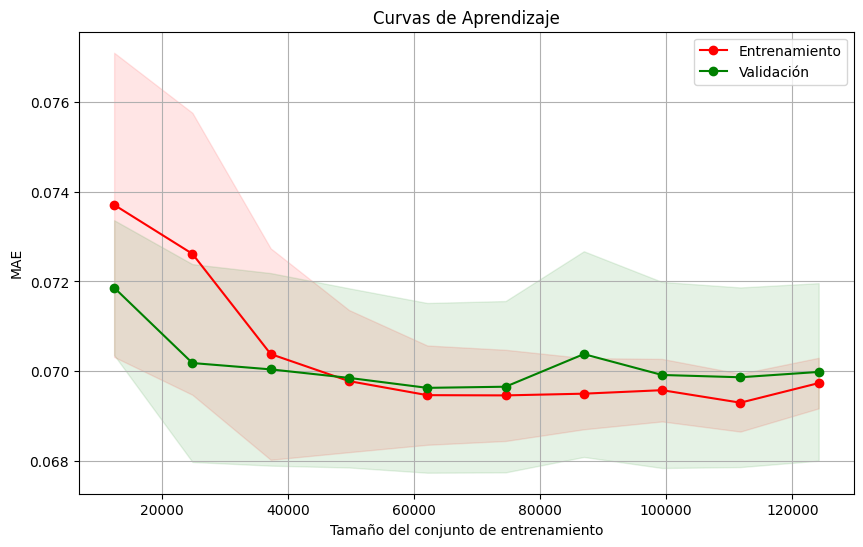

In [ ]:
# Plotear las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.title('Curvas de Aprendizaje')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('MAE')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Entrenamiento')
plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Validación')
plt.legend(loc='best')
plt.show()

Metodos Supervisados

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
# Separar los datos en características (X) y variable objetivo (y)
X_2016 = train_2016.drop('logerror', axis=1)
y_2016 = train_2016['logerror']
X_2017 = train_2017.drop('logerror', axis=1)
y_2017 = train_2017['logerror']

In [ ]:
# Crear modelos de Regresión Ridge, SVM y Random Forest
ridge_model = Ridge()
svm_model = SVR()
rf_model = RandomForestRegressor()

In [ ]:
# Entrenar los modelos
ridge_model.fit(X_2016, y_2016)



Ridge()

In [ ]:
# Predecir los valores de los datasets de 2016 y 2017
y_pred_2016 = ridge_model.predict(X_2016)
y_pred_2017 = ridge_model.predict(X_2017)

In [ ]:
# Calcular el MAE para los datasets de 2016 y 2017
mae_2016 = mean_absolute_error(y_2016, y_pred_2016)
mae_2017 = mean_absolute_error(y_2017, y_pred_2017)

In [ ]:
# Imprimir los MAE
print("MAE - Regresión Ridge (2016):", mae_2016)
print("MAE - Regresión Ridge (2017):", mae_2017)

MAE - Regresión Ridge (2016): 0.06878446828711116
MAE - Regresión Ridge (2017): 0.07047450535006293


Metodos no supervisados

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Aplicar K-means clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [ ]:
# Obtener las etiquetas de los clusters
cluster_labels = kmeans.labels_

In [ ]:
# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
# Imprimir los resultados de clustering y PCA
print("Etiquetas de los clusters:")
print(cluster_labels)
print("Componentes principales:")
print(X_pca)

Etiquetas de los clusters:
[0 0 0 ... 0 0 0]
Componentes principales:
[[-1.22696031e+11 -1.95692434e+06]
 [-1.17730490e+11  1.40732113e+06]
 [-1.19124489e+11 -8.75453799e+05]
 ...
 [ 6.16321530e+11  4.07976265e+06]
 [-1.19424470e+11 -1.99704321e+05]
 [-1.18728471e+11 -1.43347606e+05]]
